In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
# Load dataset
df = pd.read_csv("LRC.data", header=None)
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [3]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_onehot = to_categorical(y_encoded)


In [4]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)
y_test_labels = np.argmax(y_test, axis=1)  # for confusion matrix


In [5]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
# Minimal DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(16,)),
    Dense(32, activation='relu'),
    Dense(26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\anime\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Train model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2802 - loss: 2.5812 - val_accuracy: 0.6997 - val_loss: 1.1620
Epoch 2/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7090 - loss: 1.0509 - val_accuracy: 0.7569 - val_loss: 0.8564
Epoch 3/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7778 - loss: 0.7632 - val_accuracy: 0.7994 - val_loss: 0.7109
Epoch 4/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8105 - loss: 0.6541 - val_accuracy: 0.8234 - val_loss: 0.6203
Epoch 5/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8379 - loss: 0.5727 - val_accuracy: 0.8334 - val_loss: 0.5734
Epoch 6/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.8570 - loss: 0.4996 - val_accuracy: 0.8534 - val_loss: 0.5130
Epoch 7/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8647 - loss: 0.4726 - val_accuracy: 0.8644 - val_loss: 0.4737
Epoch 8/10
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8722 - loss: 0.4350 - val_accuracy: 

In [8]:
# Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {acc:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.8823 - loss: 0.3878

Test Accuracy: 0.8832


In [9]:
# Predictions
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step


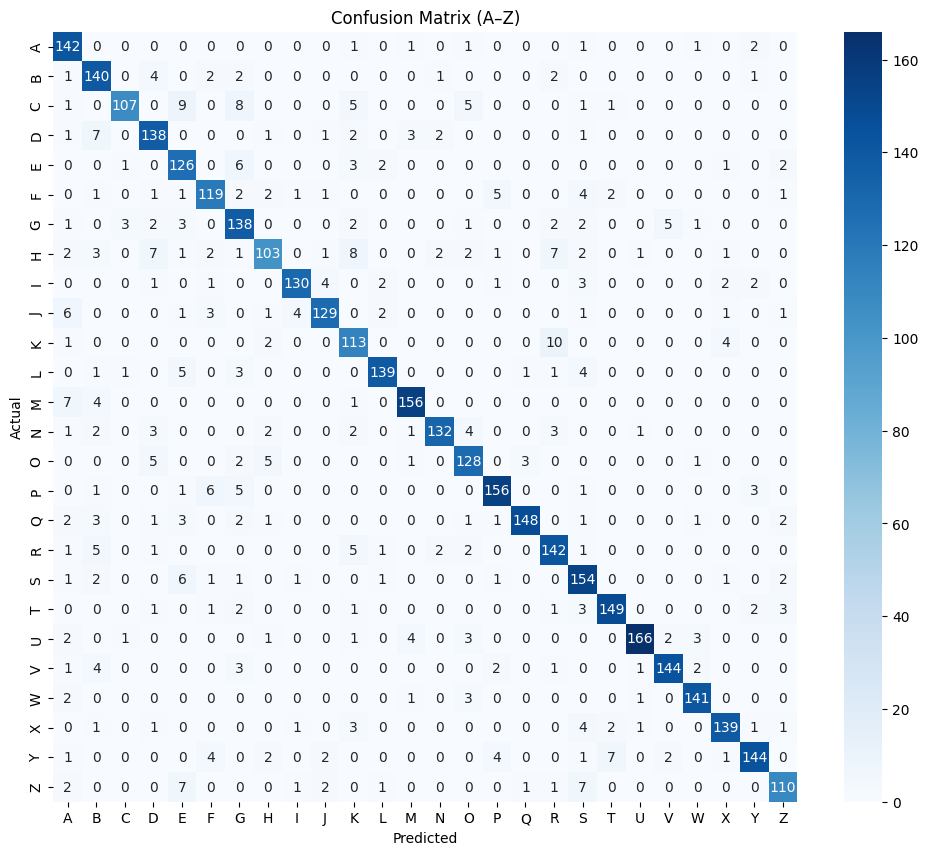

In [13]:
# Confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
labels = le.classes_

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (A–Z)")
plt.show()
# cm

In [11]:
# Optional: Classification report
print("\nClassification Report:\n")
print(classification_report(y_test_labels, y_pred_labels, target_names=labels))



Classification Report:

              precision    recall  f1-score   support

           A       0.81      0.95      0.88       149
           B       0.80      0.92      0.86       153
           C       0.95      0.78      0.86       137
           D       0.84      0.88      0.86       156
           E       0.77      0.89      0.83       141
           F       0.86      0.85      0.85       140
           G       0.79      0.86      0.82       160
           H       0.86      0.72      0.78       144
           I       0.94      0.89      0.92       146
           J       0.92      0.87      0.89       149
           K       0.77      0.87      0.82       130
           L       0.94      0.90      0.92       155
           M       0.93      0.93      0.93       168
           N       0.95      0.87      0.91       151
           O       0.85      0.88      0.87       145
           P       0.91      0.90      0.91       173
           Q       0.97      0.89      0.93       166
  